# Introduction

This project analyzes data collected from an A/B test that tests site copy (text). The client is an online education site. The AB test tests a more career focused description on a course overview page. The test looks at wether the new language encourages more users to enroll and complete the course.  Metrics:

* Enrollment Rate: Click through rate for the Enroll button the course overview page
* Average Reading Duration: Average number of seconds spent on the course overview page

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('../data/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


# Enrollment rate

In [3]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]

# Display click through rate
control_ctr

0.23452157598499063

In [4]:
# Get dataframe with all records from control group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]

# Display click through rate
experiment_ctr

0.26429861529199278

In [5]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.029777039307002151

In [6]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)

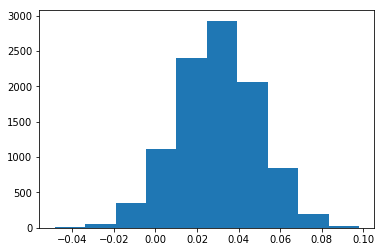

In [7]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

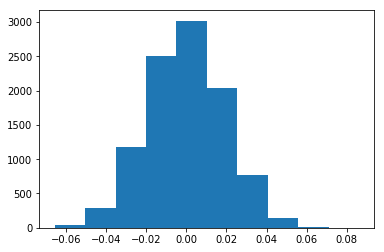

In [8]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

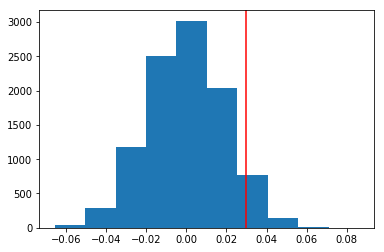

In [9]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [10]:
# Compute p-value
(null_vals > obs_diff).mean()

0.062399999999999997

We do not have evidence, with a type I error rate of 0.05, that the enrollment rate for this course increases when using the experimental description on its overview page.

# Average reading duration

In [11]:
df2 = df.copy()

In [12]:
views=df2.query('action=="view"')

In [13]:
reading_times = views.groupby(['id', 'group'])['duration'].mean()

In [14]:
reading_times = reading_times.reset_index()

In [15]:
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [16]:
control_mean = df.query('group=="control"')['duration'].mean()
experiment_mean = df.query('group=="experiment"')['duration'].mean()
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [17]:
# Compute observed difference in CTR
obs_diff_reading_time = experiment_mean - control_mean

# Display observed difference in completion rates
obs_diff_reading_time

15.525098619574393

#on average, the experiment group appears to have spent 15 more seconds than the control group in the course overview page

In [18]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
reading_diffs = []
for _ in range(10000):
    b_samp_reading = df2.sample(df2.shape[0], replace=True)
    control_mean = b_samp_reading.query('group=="control"')['duration'].mean()
    experiment_mean = b_samp_reading.query('group=="experiment"')['duration'].mean()
    reading_diffs.append(experiment_mean - control_mean)

In [19]:
reading_diffs = np.array(reading_diffs)

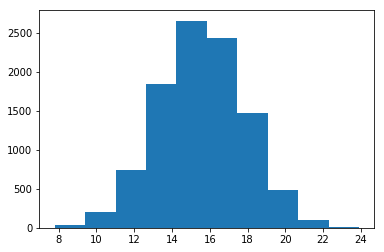

In [20]:
plt.hist(reading_diffs);

In [21]:
null_vals_reading = np.random.normal(0, diffs.std(), diffs.size)

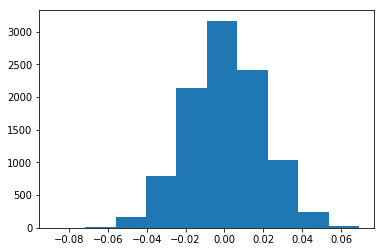

In [22]:
plt.hist(null_vals_reading);

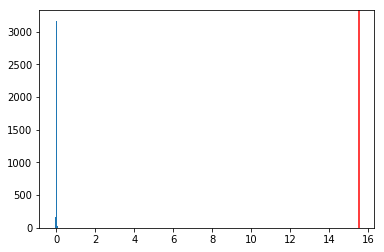

In [23]:
plt.hist(null_vals_reading);
plt.axvline(x = obs_diff_reading_time, color='red');

The observed difference looks siginificant